# **E-commerce Customer Intelligence Report**
**Project:** From RFM Segmentation to a Modeled ROI Strategy
<br> **Author:** Zak Khalwani

## **Project Overview & Setup**
---

### **Project Overview**

#### **1. Business Need**
The marketing department at "Global Mart" operates with a generic, one-size-fits-all strategy. This leads to inefficient ad spend, missed cross-selling opportunities, and a high rate of customer churn, particularly after the first purchase. The business lacks a quantitative basis for prioritizing marketing initiatives and cannot answer critical questions about the potential return on their campaign investments.

#### **2. Project Objective**
The primary objective is to create a foundational customer intelligence report that empowers the marketing team to design targeted and effective campaigns with a clear, projected ROI. This report will:
1.  **Diagnose** the current state of the customer base using RFM, Affinity, and Cohort analysis.
2.  **Model** the financial opportunity of two specific marketing interventions.
3.  **Recommend** a course of action based on a data-driven business case.

#### **3. Methodology Overview**
This report follows a five-step analytical framework:
*   **Analysis 1 & 2 (RFM/CLV):** Identify *who* our customers are and *how valuable* each segment is.
*   **Analysis 3 (Patterns):** Uncover *what* they buy and *where* they live.
*   **Analysis 4 (Cohorts):** Diagnose *when and why* we lose customers.
*   **Analysis 5 (Modeling):** Project the ROI of specific solutions to the problems we identified.

### **Setup and Data Loading**

In [228]:
# --- Core Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import os

# --- Notebook Style ---
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
pd.options.display.float_format = '{:,.2f}'.format

# --- Load Pre-Computed Data from CSVs ---
data_path = 'output/csv/' 

try:
    # Load combined RFM & CLV data (from Analysis 1 & 2)
    rfm_clv_df = pd.read_csv(os.path.join(data_path, '2_customer_rfm_clv_segments.csv'))
    
    # Load product affinity data (from Analysis 3a)
    product_affinity_df = pd.read_csv(os.path.join(data_path, '3a_top_products_by_segment.csv'))
    
    # Load geographic patterns data (from Analysis 3b)
    geo_patterns_df = pd.read_csv(os.path.join(data_path, '3b_top_locations_by_segment.csv'))
    
    # Load cohort analysis data (from Analysis 4)
    cohort_data_df = pd.read_csv(os.path.join(data_path, '4_cohort_retention_data.csv'))

    print("All analytical datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"File not found. Please ensure the following file exists: {e.filename}")

All analytical datasets loaded successfully.


## **Data Analysis & Insights**
---

### **Section 1: RFM Segmentation & Customer Value (Analyses 1 & 2)**
**Who Are Our Customers and How Valuable Are They?**
<br> **Objective:** To segment customers based on their transactional behavior (Recency, Frequency, Monetary) and quantify the historical value of each segment. This helps us understand where our revenue is concentrated.

#### **Analysis Result**

In [5]:
# Dispay the summary of analyses 1 & 2
print('Summary of Customer Value by RFM Segment:')
rfm_clv_df

Summary of Customer Value by RFM Segment:


,rfm_segment,total_customers,pct_customers,avg_clv_per_customer,total_revenue,pct_revenue
0,At Risk,23711,25.40,265.26,"6,289,521.37",40.79
1,Champions,22967,24.60,265.64,"6,100,905.24",39.57
2,Potential Loyalists,23711,25.40,64.74,"1,535,108.04",9.96
3,Needs Attention,11508,12.33,65.37,"752,295.30",4.88
4,Hibernating,11461,12.28,64.74,"741,943.80",4.81


#### **Data Visualization**

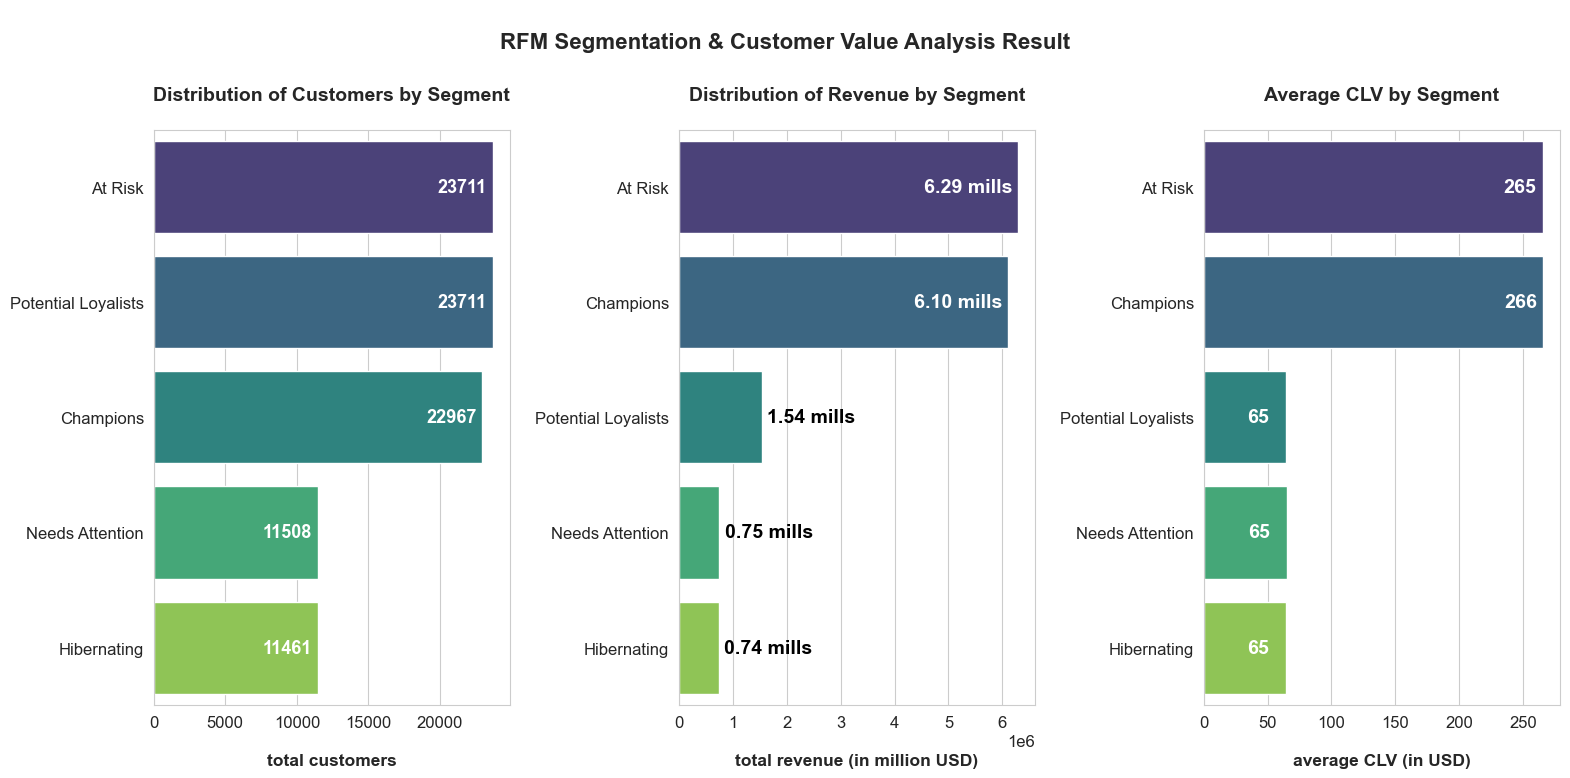

In [192]:
# Visualize analyses 1 & 2 findings  
fig, axes = plt.subplots(1, 3, figsize=(16, 8))
fig.suptitle('\nRFM Segmentation & Customer Value Analysis Result', weight='bold', fontsize=16)

# Sort data by total_customers and total_revenue
customer_sorted = rfm_clv_df.sort_values(by='total_customers', ascending=False, ignore_index=True)
revenue_sorted = rfm_clv_df.sort_values(by='total_revenue', ascending=False, ignore_index=True)
avg_clv_sorted = rfm_clv_df.sort_values(by='avg_clv_per_customer', ascending=False, ignore_index=True)

# Plot 1: Total Customers by Segmet 
sns.barplot(data=customer_sorted, y='rfm_segment', x='total_customers', ax=axes[0], hue='rfm_segment', legend=False, palette='viridis') 
axes[0].set_title('Distribution of Customers by Segment\n', weight='bold', fontsize=14)
axes[0].set_xlabel('\ntotal customers', weight='bold', fontsize=12.5)
axes[0].set_ylabel('')
# add value labels 
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', label_type='edge', padding=-40, fontsize=13, weight='bold', color='white')

# Plot 2: Total Revenue by Segmet 
sns.barplot(data=revenue_sorted, y='rfm_segment', x='total_revenue', ax=axes[1], hue='rfm_segment', legend=False, palette='viridis') 
axes[1].set_title('Distribution of Revenue by Segment\n', weight='bold', fontsize=14)
axes[1].set_xlabel('\ntotal revenue (in million USD)', weight='bold', fontsize=12.5)
axes[1].set_ylabel('')
# add labels 
million_fmt = lambda x: f'{x / 1_000_000:.2f} mills' # convert label value to millions
for container in axes[1].containers: 
    for bar in container:
        value = bar.get_width()  
        y = bar.get_y() + bar.get_height() / 2

        if value >= 2_000_000:
            # Label inside the bar
            x = value - 100_000  
            color = 'white'
            ha = 'right'
        else:
            # Label outside the bar
            x = value + 100_000  
            color = 'black'
            ha = 'left'

        axes[1].text(x, y, million_fmt(value), ha=ha, va='center', fontsize=14, weight='bold', color=color)

# Plot 3: Average CLV by Segment 
sns.barplot(data=revenue_sorted, y='rfm_segment', x='avg_clv_per_customer', ax=axes[2], hue='rfm_segment', legend=False, palette='viridis') 
axes[2].set_title('Average CLV by Segment\n', weight='bold', fontsize=14)
axes[2].set_xlabel('\naverage CLV (in USD)', weight='bold', fontsize=12.5)
axes[2].set_ylabel('')
# add value labels 
for container in axes[2].containers:
    axes[2].bar_label(container, fmt='%.0f', label_type='edge', padding=-28, fontsize=14, weight='bold', color='white')

# Display plot
plt.tight_layout(pad=1.5)
plt.show()

#### **Key Findings & Insights**

*   **Revenue is Dangerously Concentrated in Two Segments:** Over **80% of total revenue** comes from just two groups: 'Champions' (39.6%) and 'At Risk' (40.8%). This highlights a major vulnerability; the business is heavily reliant on the health and activity of these specific customers.

*   **'At Risk' Customers Are Our Most Valuable, Inactive Asset:** The 'At Risk' segment is not composed of low-value customers. Their average historical value (`$265.26`) is virtually identical to that of our 'Champions' (`$265.64`). This is a critical insight: these are former 'Champions' who have stopped purchasing. They represent the single largest pool of potential revenue that can be reactivated.

*   **A Clear Divide Between High and Low-Value Customers:** There is a stark "value cliff" between the top two segments and the rest of the customer base. The average 'Potential Loyalist' (`$64.74`) is worth only about **25%** of a 'Champion'. This suggests that customers either become highly valuable repeat purchasers or they make one or two small purchases and then quickly become disengaged.

*   **Large, Untapped Base:** Over half of our customers (`50%`) fall into the lower-value 'Potential Loyalists', 'Needs Attention', and 'Hibernating' segments. While their individual value is low, their large number presents a significant long-term opportunity if we can successfully increase their engagement and purchase frequency.

**Conclusion:** The immediate priorities are clear. We must first focus on **re-engaging the high-value 'At Risk' segment** to prevent catastrophic revenue loss. Secondly, we need to address the "value cliff" by improving our ability to convert new or occasional buyers into loyal, high-spending customers.

### **Section 2: Customer Behavior Patterns (Analysis 3)**
**What Do Our Key Segments Buy and Where Do They Live?**
<br> **Objective:** To understand the product preferences and geographic concentrations of our most important segments (`Champions`, `Potential Loyalist`, and `At Risk`) to inform targeted marketing campaigns.

#### **Product Preferences (Affinity) Analysis**

##### **Analysis Result**

In [60]:
# Display the 'product affinity' of each RFM segment
print('Summary of Product Affinity & Revenue by Segment:')
product_affinity_df

Summary of Product Affinity & Revenue by Segment:


,rfm_segment,product_category_name,total_revenue,pct_of_segment_revenue,total_orders,pct_of_segment_orders,revenue_rank
0,At Risk,health_beauty,"408,878.39",10.11,2552,10.05,1
1,At Risk,watches_gifts,"381,095.59",9.43,1712,6.74,2
2,At Risk,bed_bath_table,"321,156.51",7.94,2364,9.31,3
3,At Risk,sports_leisure,"290,604.61",7.19,1904,7.50,4
4,At Risk,computers_accessories,"280,670.94",6.94,1912,7.53,5
5,Champions,bed_bath_table,"346,394.05",8.95,2619,10.54,1
6,Champions,health_beauty,"301,704.02",7.79,1940,7.81,2
7,Champions,sports_leisure,"298,479.31",7.71,2000,8.05,3
8,Champions,watches_gifts,"269,019.73",6.95,1124,4.52,4
9,Champions,computers_accessories,"266,503.72",6.88,1476,5.94,5


##### **Data Visualization**

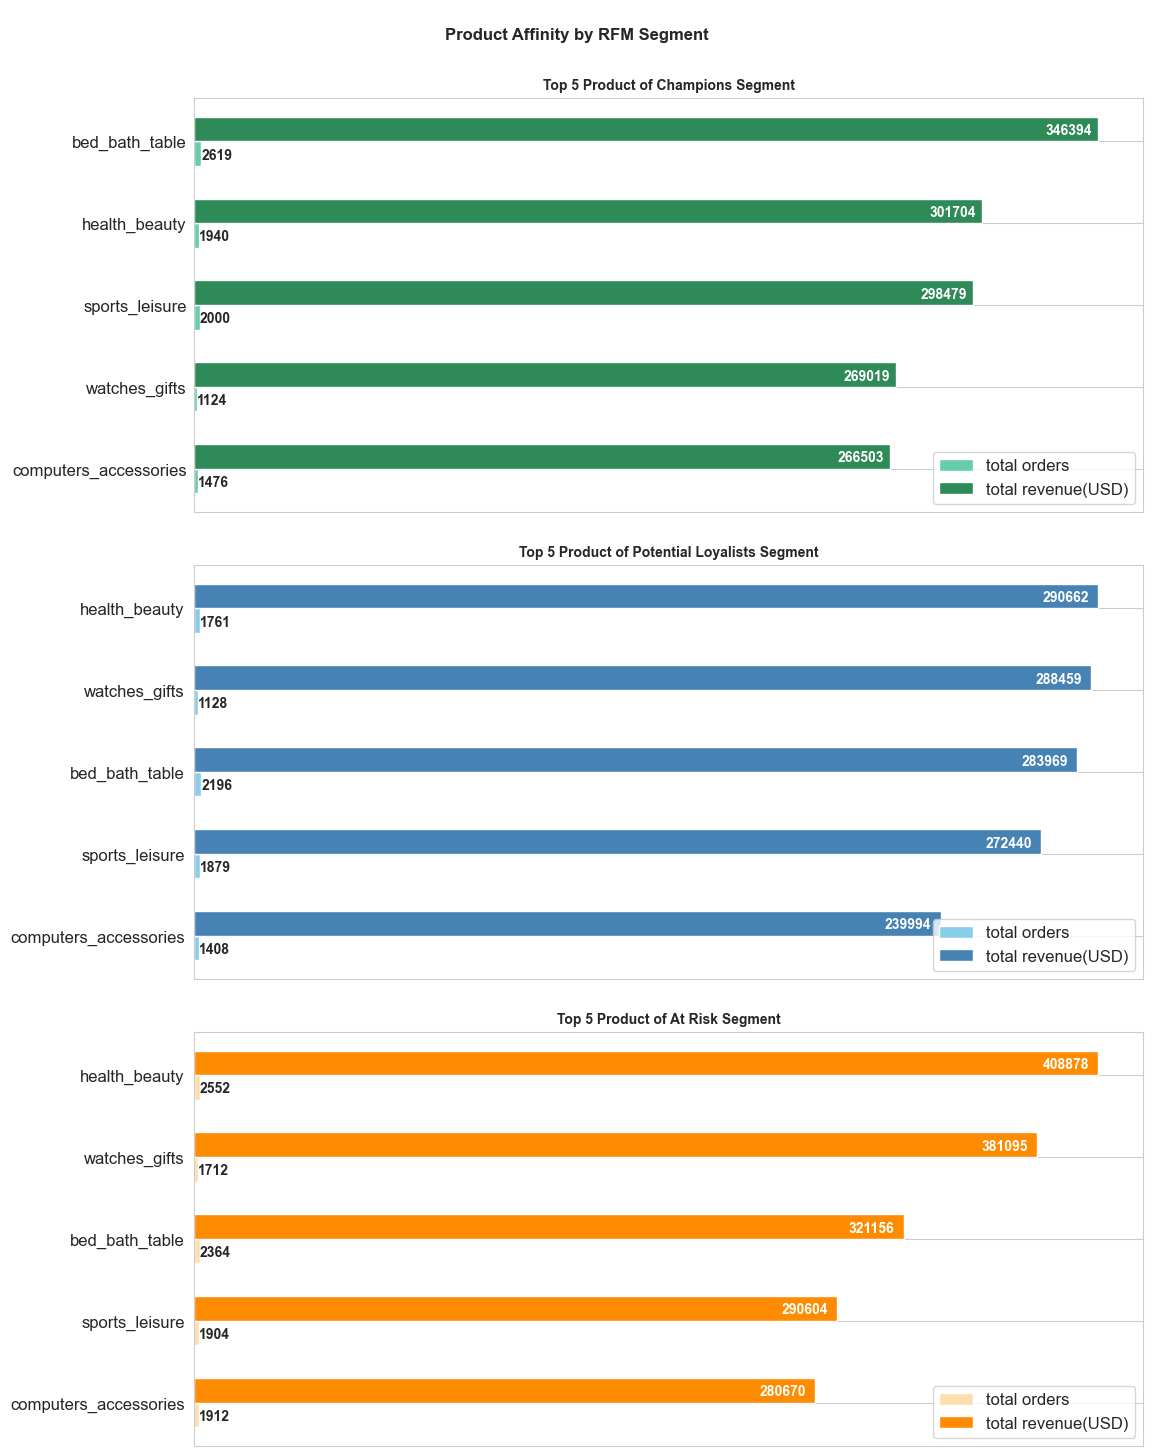

In [147]:
# Step 1: Filter 'product affinity' data for the most important segments for this analysis
# Champions segment
champions_product = product_affinity_df[product_affinity_df['rfm_segment'] == 'Champions']
champions_product_sorted = champions_product.sort_values(by='revenue_rank', ascending=False, ignore_index=True) 

# Potential Loyalist segment
potential_loyalist_product = product_affinity_df[product_affinity_df['rfm_segment'] == 'Potential Loyalists']
potential_loyalist_product_sorted = potential_loyalist_product.sort_values(by='revenue_rank', ascending=False, ignore_index=True) 

# At Risk segment
at_risk_product = product_affinity_df[product_affinity_df['rfm_segment'] == 'At Risk']
at_risk_product_sorted = at_risk_product.sort_values(by='revenue_rank', ascending=False, ignore_index=True) 
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 2: Set up bar plot   
fig, axes = plt.subplots(3, 1, figsize=(12, 15)) # create subplots
fig.suptitle('\nProduct Affinity by RFM Segment', weight='bold', fontsize=12) # add title
height = 0.3 # define bar thickness
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 3: Visualize Champions Segment 
# Extract values
p1_categories = champions_product_sorted['product_category_name']
p1_orders = champions_product_sorted['total_orders']
p1_revenue = champions_product_sorted['total_revenue']

# Define position of the bar 
y1 = np.arange(len(p1_categories)) 

# Plot
bar1 = axes[0].barh(y1 - height/2, p1_orders, height, label='total orders', color='mediumaquamarine')
bar2 = axes[0].barh(y1 + height/2, p1_revenue, height, label='total revenue(USD)', color='seagreen')

# Labels and styling
axes[0].set_yticks(y1)
axes[0].set_yticklabels(p1_categories)
axes[0].set_xlabel('')
axes[0].set_xticks([])
axes[0].tick_params(axis='y', pad=2) 
axes[0].set_title('Top 5 Product of Champions Segment', fontsize=10, weight='bold')
axes[0].legend()

# Add data labels
for bar in bar1:
    axes[0].text(bar.get_width()+10, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', weight='bold', fontsize=10)
for bar in bar2:
    axes[0].text(bar.get_width()-20000, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='white', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 4: Visualize Potentail Loyalist Segment 
# Extract values
p2_categories = potential_loyalist_product_sorted['product_category_name']
p2_orders = potential_loyalist_product_sorted['total_orders']
p2_revenue = potential_loyalist_product_sorted['total_revenue']

# Define position of bar 
y2 = np.arange(len(p2_categories)) 

# Plot
bar3 = axes[1].barh(y2 - height/2, p2_orders, height, label='total orders', color='skyblue')
bar4 = axes[1].barh(y2 + height/2, p2_revenue, height, label='total revenue(USD)', color='steelblue')

# Labels and styling
axes[1].set_yticks(y2)
axes[1].set_yticklabels(p2_categories)
axes[1].set_xlabel('')
axes[1].set_xticks([])
axes[1].set_title('Top 5 Product of Potential Loyalists Segment', fontsize=10, weight='bold')
axes[1].legend()

# Add data labels
for bar in bar3:
    axes[1].text(bar.get_width()+10, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', weight='bold', fontsize=10)
for bar in bar4:
    axes[1].text(bar.get_width()-18000, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='white', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 5: Visualize At Risk Segment 
# Extract values
p3_categories = at_risk_product_sorted['product_category_name']
p3_orders = at_risk_product_sorted['total_orders']
p3_revenue = at_risk_product_sorted['total_revenue']

# Define position of the bar 
y3 = np.arange(len(p3_categories)) 

# Plot
bar3 = axes[2].barh(y3 - height/2, p3_orders, height, label='total orders', color='navajowhite')
bar4 = axes[2].barh(y3 + height/2, p3_revenue, height, label='total revenue(USD)', color='darkorange')

# Labels and styling
axes[2].set_yticks(y3)
axes[2].set_yticklabels(p3_categories)
axes[2].set_xlabel('')
axes[2].set_xticks([])
axes[2].set_title('Top 5 Product of At Risk Segment', fontsize=10, weight='bold')
axes[2].legend()

# Add data labels
for bar in bar3:
    axes[2].text(bar.get_width()+10, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', weight='bold', fontsize=10)
for bar in bar4:
    axes[2].text(bar.get_width()-25000, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='white', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 6: Display plot 
plt.tight_layout(pad=2.0)
plt.show()

##### **Key Findings & Insights**

*   **Core Categories Span All Segments:** Key categories like `bed_bath_table`, `health_beauty`, and `sports_leisure` are popular across all major segments. These represent foundational product lines that are crucial to the business.
*   **'Champions' Over-index on High-Value Goods:** While sharing core preferences, our 'Champions' show a significantly higher spend on `watches_gifts`. This indicates a willingness to make high-value, discretionary purchases and identifies a key category for loyalty rewards and premium marketing.
*   **'At Risk' Tastes Are Known:** The purchasing history of the 'At Risk' segment is clear. We know they have a high affinity for `health_beauty` and `bed_bath_table`. This provides a perfect, data-driven starting point for creating targeted "we miss you" campaigns featuring products we know they like.

**Conclusion:** We have a clear understanding of the product preferences for our key segments. This allows us to move beyond generic marketing and create highly relevant, personalized campaigns designed to either reward loyalty ('Champions') or re-ignite interest ('At Risk').

#### **Geography Pattern Analysis**

##### **Analysis Result**

In [84]:
# Display the 'Geography Pattern' of each RFM segment
print('Summary of Geography Pattern & Revenue by Segment:')
geo_patterns_df

Summary of Geography Pattern & Revenue by Segment:


,rfm_segment,state,total_customers,pct_of_segment_customers,total_revenue,pct_of_segment_revenue,geo_rank
0,At Risk,SP,10339,44.14,"1,881,097.06",40.16,1
1,At Risk,RJ,2849,12.16,"580,679.70",12.40,2
2,At Risk,MG,2744,11.72,"550,061.94",11.74,3
3,At Risk,RS,1216,5.19,"268,428.55",5.73,4
4,At Risk,PR,1188,5.07,"233,801.88",4.99,5
5,Champions,SP,9183,39.42,"1,532,107.27",35.58,1
6,Champions,RJ,3169,13.60,"634,744.70",14.74,2
7,Champions,MG,2796,12.00,"500,639.51",11.63,3
8,Champions,RS,1355,5.82,"258,066.77",5.99,4
9,Champions,PR,1178,5.06,"212,964.80",4.95,5


##### **Data Visualization**

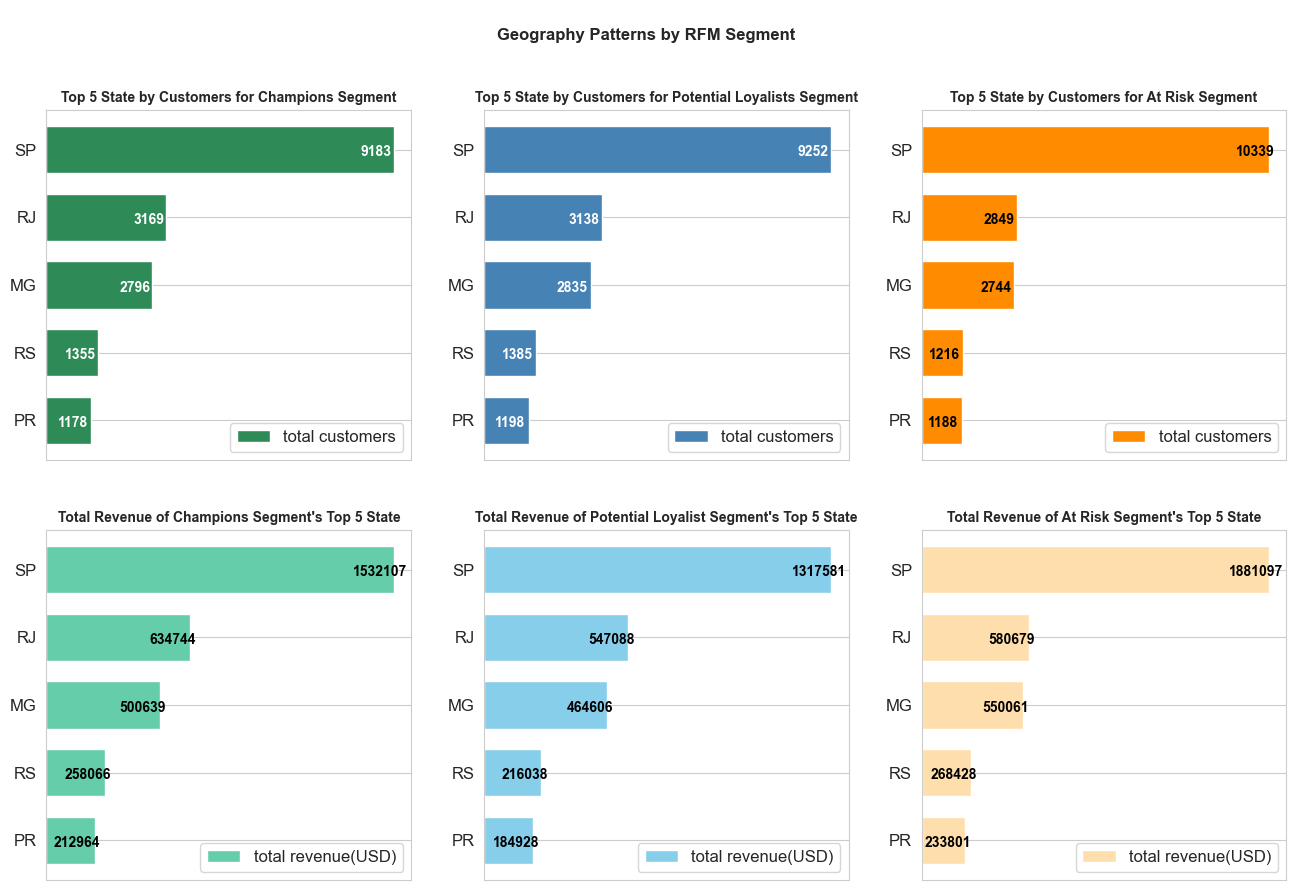

In [149]:
# Step 1: Filter 'product affinity' data for the most important segments for this analysis
# Champions segment
champions_geo = geo_patterns_df[geo_patterns_df['rfm_segment'] == 'Champions']
champions_geo_sorted = champions_geo.sort_values(by='geo_rank', ascending=False, ignore_index=True) 

# Potential Loyalist segment
potential_loyalist_geo = geo_patterns_df[geo_patterns_df['rfm_segment'] == 'Potential Loyalists']
potential_loyalist_geo_sorted = potential_loyalist_geo.sort_values(by='geo_rank', ascending=False, ignore_index=True) 

# At Risk segment
at_risk_geo = geo_patterns_df[geo_patterns_df['rfm_segment'] == 'At Risk']
at_risk_geo_sorted = at_risk_geo.sort_values(by='geo_rank', ascending=False, ignore_index=True) 
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 2: Set up bar plot   
fig, axes = plt.subplots(2, 3, figsize=(16, 10)) # create subplots
fig.suptitle('\nGeography Patterns by RFM Segment', weight='bold', fontsize=12) # add title
height = 0.7 # define bar thickness
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 3: Visualize Champions Segment(Customers)
# Extract values
p1_categories = champions_geo_sorted['state']
p1_customers = champions_geo_sorted['total_customers']

# Define position of the bar 
y1 = np.arange(len(p1_categories)) 

# Plot
bar1 = axes[0,0].barh(y1, p1_customers, height, label='total customers', color='seagreen') #mediumaquamarine

# Labels and styling
axes[0,0].set_yticks(y1)
axes[0,0].set_yticklabels(p1_categories)
axes[0,0].set_xlabel('')
axes[0,0].set_xticks([])
axes[0,0].set_title('Top 5 State by Customers for Champions Segment', fontsize=10, weight='bold')
axes[0,0].legend()

# Add data labels
for bar in bar1:
    axes[0,0].text(bar.get_width()-870, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='white', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 4: Visualize Potential Loyalist Segment(Customers) 
# Extract values
p2_categories = potential_loyalist_geo_sorted['state']
p2_customers = potential_loyalist_geo_sorted['total_customers']

# Define position of the bar 
y2 = np.arange(len(p2_categories)) 

# Plot
bar2 = axes[0,1].barh(y2, p2_customers, height, label='total customers', color='steelblue') #skyblue 

# Labels and styling
axes[0,1].set_yticks(y2)
axes[0,1].set_yticklabels(p2_categories)
axes[0,1].set_xlabel('')
axes[0,1].set_xticks([])
axes[0,1].set_title('Top 5 State by Customers for Potential Loyalists Segment', fontsize=10, weight='bold')
axes[0,1].legend()

# Add data labels
for bar in bar2:
    axes[0,1].text(bar.get_width()-900, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='white', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 5: Visualize At Risk Segment(Customers) 
# Extract values
p3_categories = at_risk_geo_sorted['state']
p3_customers = at_risk_geo_sorted['total_customers']

# Define position of the bar 
y3 = np.arange(len(p3_categories)) 

# Plot
bar3 = axes[0,2].barh(y3, p3_customers, height, label='total customers', color='darkorange') #navajowhite 

# Labels and styling
axes[0,2].set_yticks(y2)
axes[0,2].set_yticklabels(p2_categories)
axes[0,2].set_xlabel('')
axes[0,2].set_xticks([])
axes[0,2].set_title('Top 5 State by Customers for At Risk Segment', fontsize=10, weight='bold')
axes[0,2].legend()

# Add data labels
for bar in bar3:
    axes[0,2].text(bar.get_width()-1000, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='black', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 6: Visualize Champions Segment(Revenue) 
# Extract values
p4_categories = champions_geo_sorted['state']
p4_revenue = champions_geo_sorted['total_revenue']

# Define position of the bar 
y4 = np.arange(len(p4_categories)) 

# Plot
bar4 = axes[1,0].barh(y4, p4_revenue, height, label='total revenue(USD)', color='mediumaquamarine') #seagreen

# Labels and styling
axes[1,0].set_yticks(y1)
axes[1,0].set_yticklabels(p1_categories)
axes[1,0].set_xlabel('')
axes[1,0].set_xticks([])
axes[1,0].set_title("Total Revenue of Champions Segment's Top 5 State", fontsize=10, weight='bold')
axes[1,0].legend()

# Add data labels
for bar in bar4:
    axes[1,0].text(bar.get_width()-180000, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='black', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 7: Visualize Potential Loyalist Segment(Revenue) 
# Extract values
p5_categories = potential_loyalist_geo_sorted['state']
p5_customers = potential_loyalist_geo_sorted['total_revenue']

# Define position of the bar 
y5 = np.arange(len(p5_categories)) 

# Plot
bar5 = axes[1,1].barh(y5, p5_customers, height, label='total revenue(USD)', color='skyblue') #steelblue 

# Labels and styling
axes[1,1].set_yticks(y5)
axes[1,1].set_yticklabels(p5_categories)
axes[1,1].set_xlabel('')
axes[1,1].set_xticks([])
axes[1,1].set_title("Total Revenue of Potential Loyalist Segment's Top 5 State", fontsize=10, weight='bold')
axes[1,1].legend()

# Add data labels
for bar in bar5:
    axes[1,1].text(bar.get_width()-150000, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='black', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 8: Visualize At Risk Segment(Revenue) 
# Extract values
p6_categories = at_risk_geo_sorted['state']
p6_customers = at_risk_geo_sorted['total_revenue']

# Define position of the bar 
y6 = np.arange(len(p6_categories)) 

# Plot
bar6 = axes[1,2].barh(y6, p6_customers, height, label='total revenue(USD)', color='navajowhite') #darkorange 

# Labels and styling
axes[1,2].set_yticks(y6)
axes[1,2].set_yticklabels(p6_categories)
axes[1,2].set_xlabel('')
axes[1,2].set_xticks([])
axes[1,2].set_title("Total Revenue of At Risk Segment's Top 5 State", fontsize=10, weight='bold')
axes[1,2].legend()

# Add data labels
for bar in bar6:
    axes[1,2].text(bar.get_width()-220000, bar.get_y() + bar.get_height()/2.25, f'{int(bar.get_width())}', va='center', color='black', weight='bold', fontsize=10)
# ------------------------------------------------------------------------------------------------------------------------------------

# Step 9: Display plot 
plt.show()

##### **Key Findings & Insights**

*   **São Paulo (SP) is the Epicenter:** The state of São Paulo is overwhelmingly the most important region for all key customer segments, both in terms of customer count and total revenue. It is the undeniable center of gravity for the business.
*   **Consistent Top 5 Markets:** The top 5 states (`SP`, `RJ`, `MG`, `RS`, `PR`) are consistent across all valuable segments. This indicates that our core markets are well-established and efforts should be concentrated here for the highest impact.
*   **Revenue Mirrors Customer Count:** The ranking of states by total customers almost perfectly mirrors the ranking by total revenue. This suggests that our customer value is relatively evenly distributed across our top markets, and a strategy focused on increasing customer count in these key states will directly lead to revenue growth.

**Conclusion:** Marketing and logistical resources should be heavily prioritized towards the top 5 states, with a primary focus on São Paulo. These regions represent the most reliable and valuable markets for acquiring and retaining high-value customers.

### **Section 3: Customer Retention & Loyalty (Analysis 4)**
**When and Why Are We Losing Customers?**
<br> **Objective:** To diagnose the "leaky bucket" problem by tracking customer retention over time. This analysis will quantify the churn problem and identify the most critical point in the customer lifecycle to intervene.

#### **Analysis Result & Data Visualization**

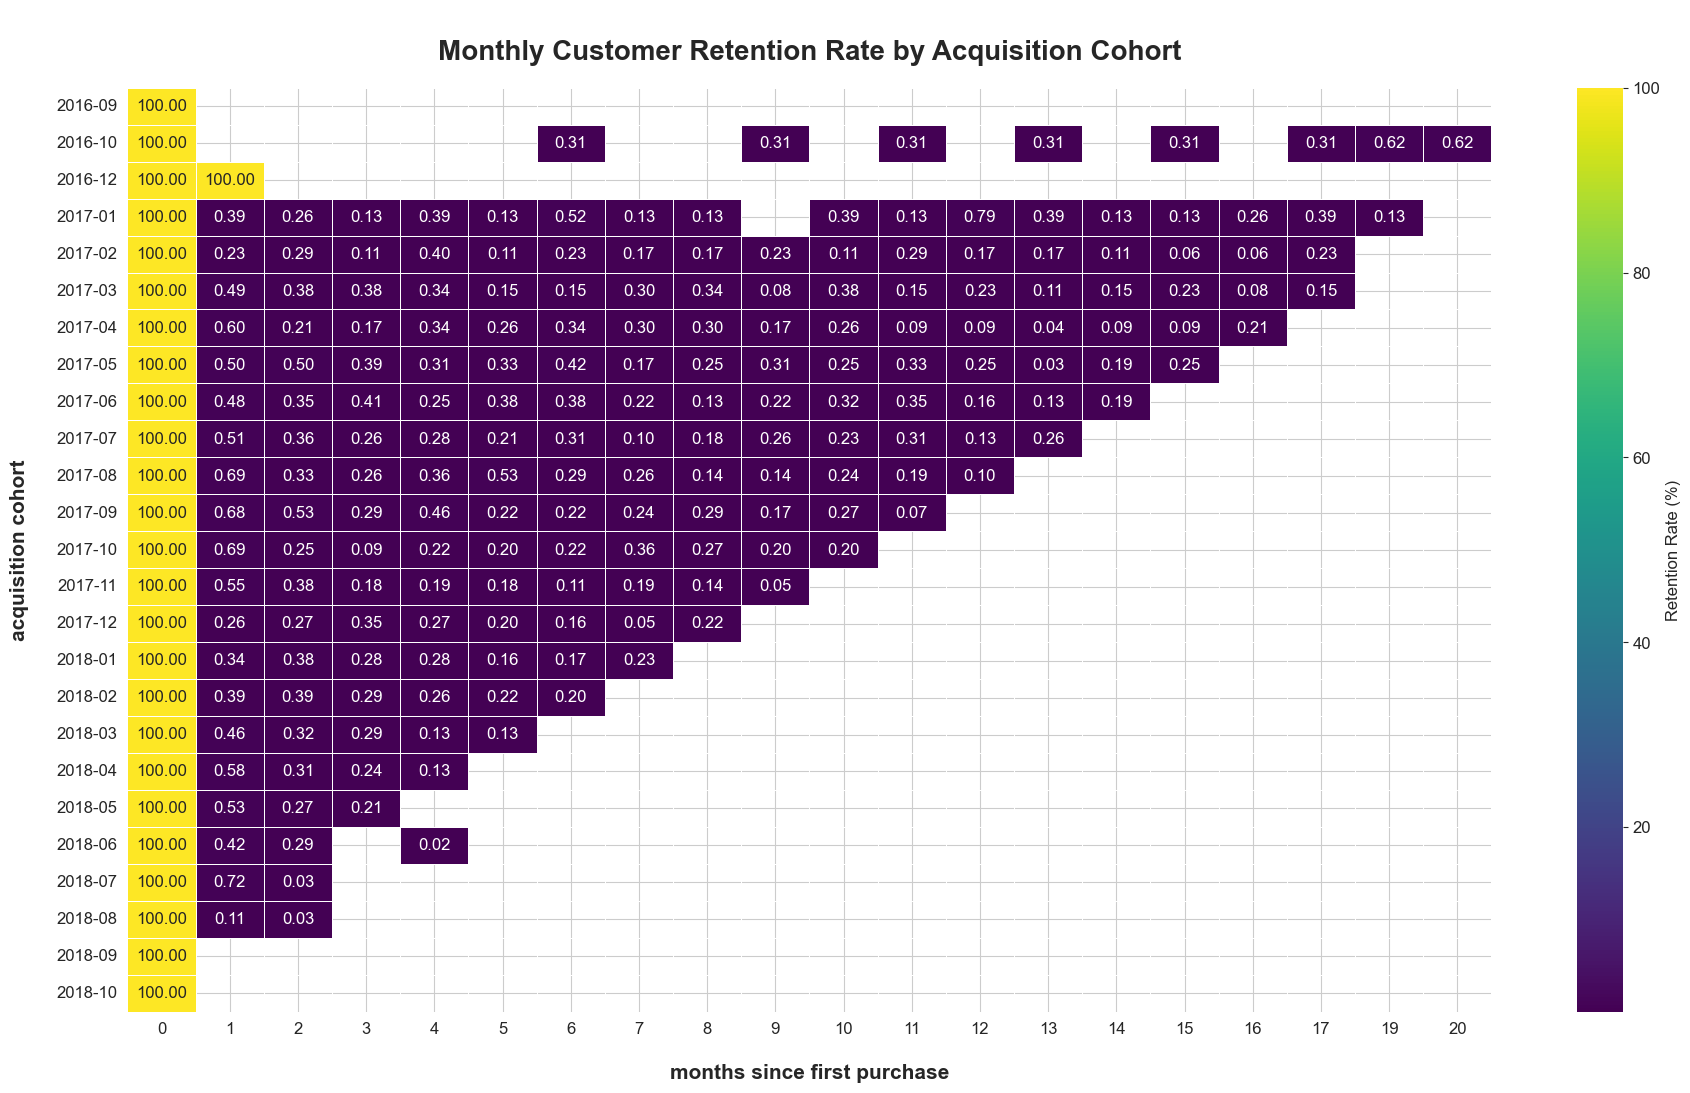

In [139]:
# Ensure cohort_month is datetime for correct sorting
cohort_data_df['cohort_month'] = pd.to_datetime(cohort_data_df['cohort_month'])

# Pivot the data into a matrix format for the heatmap
cohort_pivot = cohort_data_df.pivot_table(index='cohort_month', columns='cohort_index', values='retention_rate')
cohort_pivot.index = cohort_pivot.index.strftime('%Y-%m')

# Create the heatmap
plt.figure(figsize=(22, 12))
sns.heatmap(cohort_pivot, annot=True, fmt='.2f', cmap='viridis', linewidths=.5, cbar_kws={'label': 'Retention Rate (%)'})
plt.title('\nMonthly Customer Retention Rate by Acquisition Cohort', fontsize=20, weight='bold', pad=20)
plt.xlabel('\nmonths since first purchase', weight='bold', fontsize=15)
plt.ylabel('acquisition cohort\n', weight='bold', fontsize=15)

# Display heatmap
plt.show()

#### **Key Findings & Insights**

*   **Critical First-Month Churn Confirmed:** The heatmap provides stark visual proof of a severe retention problem. After the initial purchase (`month 0`), retention plummets dramatically. Across all cohorts, the retention rate in the second month (`month 1`) is consistently less than 0.5%.
*   **The "Leaky Bucket" is at the Top:** Our business is exceptionally good at acquiring new customers but fundamentally fails to encourage a second purchase. This "one-and-done" phenomenon is the primary driver of customer churn and directly explains why so many customers end up in the 'Hibernating' and 'Needs Attention' RFM segments.
*   **The High-Stakes Second Purchase:** While initial churn is severe, the tiny fraction of customers who *do* return show more stable (though still low) retention in subsequent months. This is a critical insight: **if we can successfully engineer a second purchase, we dramatically increase the probability of creating a long-term, valuable customer.**

**Conclusion:** The single greatest opportunity for sustainable growth lies in fixing the onboarding experience to bridge the gap between the first and second sale. This justifies a strategic investment in a "New Customer Welcome" program.

### **Section 4: Opportunity Modeling & ROI Projection (Analysis 5)**
**Objective:** To translate our key diagnostic findings into two distinct, forward-looking financial models. The goal is to provide a quantitative, defensible projection of the Return on Investment (ROI) for two proposed marketing initiatives, empowering leadership to make a data-driven investment decision.

#### **Model 1: "At-Risk" Customer Win-Back Campaign**
* **Problem:** Our analysis identified an 'At Risk' segment of over 23,000 customers who represent 41% of our total historical revenue. These are former 'Champions' who are now inactive.
* **Proposed Solution:** Launch a targeted "Win-Back" campaign (e.g., a personalized email with a compelling, one-time offer) to re-engage this segment.
* **Objective of this Model:** To project the potential net profit and ROI of this campaign under various success-rate scenarios.

##### **Step 1: Define Inputs & Assumptions**

In [241]:
# calculate the total customers of the 'at risk' segment 
at_risk_customers = rfm_clv_df[rfm_clv_df['rfm_segment'] == 'At Risk']['total_customers'][0]

# Estimate the the value of the value of a single "next purchase" using the avg spend of 'at risk' segment 
# assume a 25% gross profit margin (this is a standard e-commerce assumption)
GROSS_PROFIT_MARGIN = 0.25
at_risk_avg_spend = rfm_clv_df[rfm_clv_df['rfm_segment'] == 'At Risk']['avg_clv_per_customer'][0]
avg_profit_per_reactivation = at_risk_avg_spend * GROSS_PROFIT_MARGIN

# Define the cost of the marketing intervention
# Let's assume a cost of $10 per customer for an email and targeted ad campaign.
cost_per_outreach = 0.5
total_campaign_cost = number_of_at_risk_customers * cost_per_outreach

# Define a range of potential "win-back" success rates for the sensitivity analysis.
win_back_success_rates = [0.01, 0.03, 0.05, 0.08, 0.10, 0.15, 0.20]  # 1%, 3%, 5%, 8%, 10%, 15%, 20%

# Print the key assumptions for clarity
print("\033[1mWin-Back Campaign Model Assumptions:\033[0m")
print(f" - Number of 'At Risk' Customers to Target: {int(number_of_at_risk_customers):,}")
print(f" - Average Historical Spend of an 'At Risk' Customer: ${avg_spend_at_risk:,.2f}")
print(f" - Assumed Gross Profit Margin: {GROSS_PROFIT_MARGIN:.0%}")
print(f" - Cost per Customer Outreach: ${cost_per_outreach:,.2f}")
print(f" - Total Fixed Campaign Cost: ${total_campaign_cost:,.2f}")
print(f" - Estimated Gross Profit per Reactivated Customer: ${avg_profit_per_reactivation:,.2f}")

Win-Back Campaign Model Assumptions:
 - Number of 'At Risk' Customers to Target: 23,711
 - Average Historical Spend of an 'At Risk' Customer: $265.26
 - Assumed Gross Profit Margin: 25%
 - Cost per Customer Outreach: $0.50
 - Total Fixed Campaign Cost: $11,855.50
 - Estimated Gross Profit per Reactivated Customer: $66.31


##### **Step 2: Build the ROI Model & Sensitivity Table**

In [290]:
results_win_back = []
for rate in win_back_success_rates: 
    # Calculate how many customers we successfully win back
    customers_retained = at_risk_customers * rate

    # Calculate the total gross profit from these retained customers
    total_gross_profit = avg_profit_per_reactivation * customers_retained

    # Calculate the final net profit of the campaign
    net_profit = total_gross_profit - total_campaign_cost

    # Calculate the Return on Investment (ROI)
    roi = (net_profit/total_campaign_cost)*100 if total_marketing_cost > 0 else 0 

    results_win_back.append({
        'Win-Back Success Rate': f'{rate:.0%}',
        'Projected Retained Customers': int(customers_retained),
        'Total Campaign Cost': total_campaign_cost,
        'Projected Gross Profit': total_gross_profit,
        'Projected Net Profit': net_profit,
        'Projected ROI (%)': roi
    })

# store 'results_win_bank' in pandas df 
win_back_opportunity = pd.DataFrame(results_win_back)

print("\033[1mROI Model for 'At-Risk' Win-Back Campaign:\033[0m")
display(win_back_opportunity)

ROI Model for 'At-Risk' Win-Back Campaign:


,Win-Back Success Rate,Projected Retained Customers,Total Campaign Cost,Projected Gross Profit,Projected Net Profit,Projected ROI (%)
0,1%,237,"11,855.50","15,723.95","3,868.45",32.63
1,3%,711,"11,855.50","47,171.85","35,316.35",297.89
2,5%,1185,"11,855.50","78,619.75","66,764.25",563.15
3,8%,1896,"11,855.50","125,791.60","113,936.10",961.04
4,10%,2371,"11,855.50","157,239.50","145,384.00","1,226.30"
5,15%,3556,"11,855.50","235,859.24","224,003.74","1,889.45"
6,20%,4742,"11,855.50","314,478.99","302,623.49","2,552.60"


##### **Step 3: Visualize the Business Case**

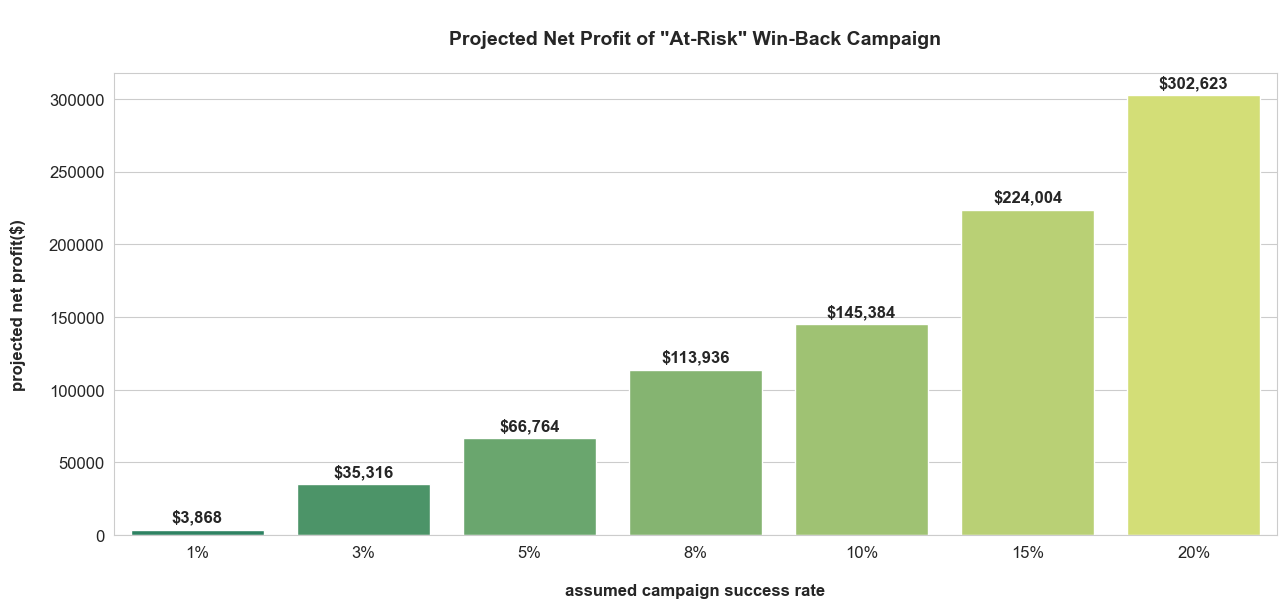

In [306]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=win_back_opportunity, x='Win-Back Success Rate', y='Projected Net Profit', palette='summer', hue='Win-Back Success Rate', label=False)
ax.set_title('\nProjected Net Profit of "At-Risk" Win-Back Campaign\n', fontsize=14, weight='bold')
ax.set_xlabel('\nassumed campaign success rate', weight='bold', fontsize=12)
ax.set_ylabel('projected net profit($)\n', weight='bold', fontsize=12)

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                weight='bold',
                fontsize=12)

# Display plot
plt.show()

#### **Model 2: New Customer "Welcome Series" Value Model**
* **Problem:** Our Cohort Analysis revealed a critical drop-off after the first purchase. The business is failing to convert new buyers into repeat customers.
* **Proposed Solution:** Implement an automated "Welcome Series" email campaign to better onboard new customers and provide an incentive for their second purchase.
* **Objective of this Model:** To project the additional annual net value generated by improving the second-month retention rate.

##### **Step 1: Define Inputs & Assumptions**

In [286]:
# Calculate the average number of new customers acquired per month.
# We get this from the cohort analysis data where cohort_index is 0.
avg_monthnly_new_customer = cohort_data_df[cohort_data_df['cohort_index'] == 0]['total_customers'].mean()

# Calculate the average retention rate in the second month (index=1) from the cohort data.
second_month_retention_rate = cohort_data_df[cohort_data_df['cohort_index'] == 1]['retention_rate'].mean()

# Estimate the long-term value (LTV) of a customer who IS successfully retained.
# A good proxy is the average historical spend of a multi-purchase customer.
# Let's use the 'Potential Loyalists' segment, as they represent this group.
retained_customer_ltv = rfm_clv_df[rfm_clv_df['rfm_segment'] == 'Potential Loyalists']['avg_clv_per_customer'].iloc[0]

# Define the cost of the incentive (e.g., a $10 coupon)
# This is Cost Per Acquisition for the 2nd purchase
cost_of_incentive = 10.00

# Define a range of potential *improvements* in our retention rate.
# E.g., a 5% improvement means the 0.4% retention rate becomes 0.4% * (1 + 0.05) = 0.42%
improvement_scenarios = [0.05, 0.08, 0.10, 0.15, 0.20, 0.25, 0.30]   # Improve retention by 5%, 10%, 15%, etc.

# Print the key assumptions
print("\033[1mWelcome Series Value Model Assumptions:\033[0m")
print(f" - Average New Customers per Month: {avg_monthnly_new_customer:,.0f}")
print(f" - Current Second-Month Retention Rate: {second_month_retention_rate:.2f}%")
print(f" - Estimated LTV of a Successfully Retained Customer: ${retained_customer_ltv:,.2f}")
print(f" - Cost of Incentive per Retained Customer: ${cost_of_incentive:,.2f}")

Welcome Series Value Model Assumptions:
 - Average New Customers per Month: 3,844
 - Current Second-Month Retention Rate: 5.22%
 - Estimated LTV of a Successfully Retained Customer: $64.74
 - Cost of Incentive per Retained Customer: $10.00


##### **Step 2: Build the Value Model & Sensitivity Table**

In [285]:
results_welcome_series = []

for scenario in improvement_scenarios: 
    # Calculate the new, improved retention rate
    new_retention_rate = second_month_retention_rate * (1 + scenario)

    # Calculate how many additional customers we retain each month due to the campaign
    additional_monthly_retained_customers = avg_monthnly_new_customer * (new_retention_rate - second_month_retention_rate)

    # Calculate the gross LTV of these newly retained customers
    gross_ltv_gained_per_month = retained_customer_ltv * additional_monthly_retained_customers

    # Calculate the cost of the incentives for only these additional customers
    total_incentive_cost_per_month = additional_monthly_retained_customers * cost_of_incentive

    # Calculate the net value gained per month
    net_value_gain_per_month = gross_ltv_gained_per_month - total_incentive_cost_per_month 

    # Annualize the impact for a more impressive business case
    annualized_net_value_gain = net_value_gain_per_month * 12

    results_welcome_series.append({
        'Retention Improvement': f'{scenario:.0%}',
        'New Retention Rate': f'{new_retention_rate:.2f}%',
        'Additional Retained Customers/Month': int(additional_monthly_retained_customers),
        'Net Value Gain/Month': f'{net_value_gain_per_month:,.2f}',
        'Projected Annual Net Value Gain': annualized_net_value_gain
    })

welcome_series_opportunity = pd.DataFrame(results_welcome_series)

print("Value Model for Improving Second-Purchase Retention")
display(welcome_series_opportunity)

Value Model for Improving Second-Purchase Retention


,Retention Improvement,New Retention Rate,Additional Retained Customers/Month,Net Value Gain/Month,Projected Annual Net Value Gain
0,5%,5.48%,1003,"54,917.48","659,009.76"
1,8%,5.64%,1605,"87,867.97","1,054,415.62"
2,10%,5.74%,2006,"109,834.96","1,318,019.53"
3,15%,6.00%,3009,"164,752.44","1,977,029.29"
4,20%,6.26%,4012,"219,669.92","2,636,039.05"
5,25%,6.52%,5016,"274,587.40","3,295,048.81"
6,30%,6.79%,6019,"329,504.88","3,954,058.58"


##### **Step 3: Data Visualization**

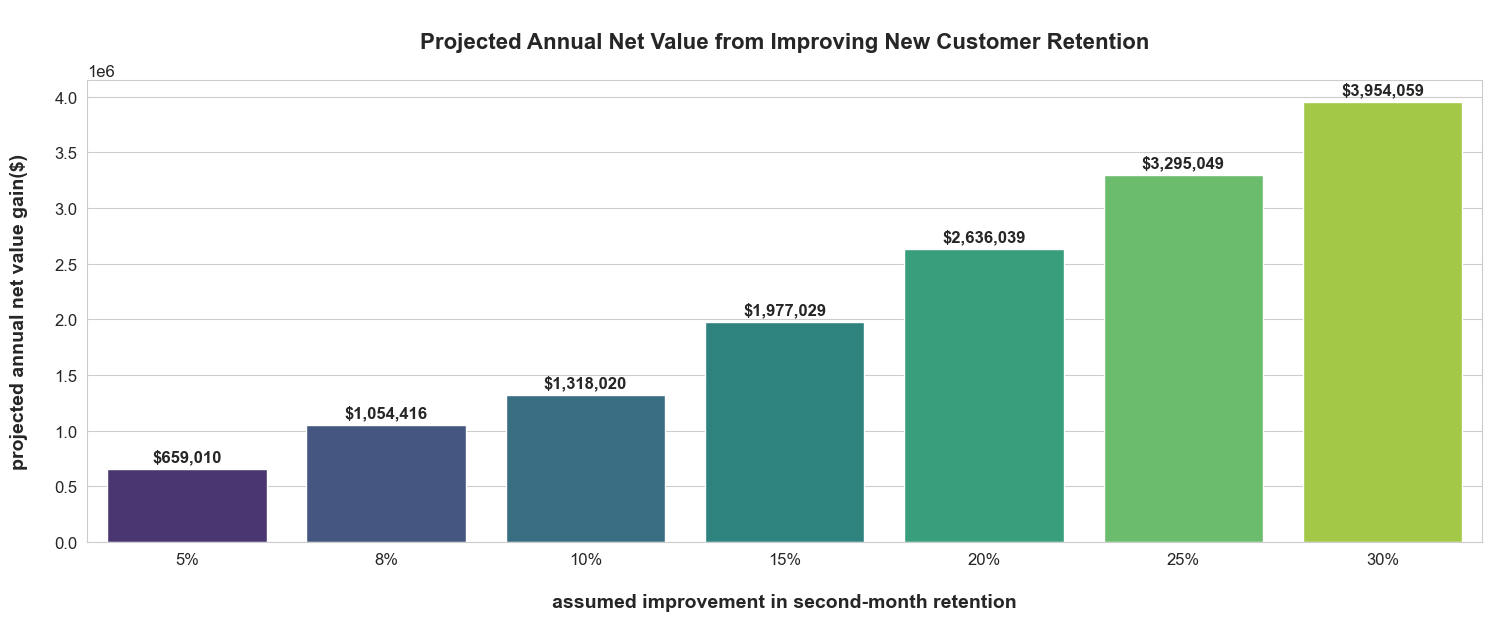

In [307]:
# Step 3: Visualize the Business Casw
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=welcome_series_opportunity, x='Retention Improvement', y='Projected Annual Net Value Gain', hue='Retention Improvement', label=False, palette='viridis')
ax.set_title('\nProjected Annual Net Value from Improving New Customer Retention\n', fontsize=16, weight='bold')
ax.set_xlabel('\nassumed improvement in second-month retention', weight='bold', fontsize=14)
ax.set_ylabel('projected annual net value gain($)\n', weight='bold', fontsize=14)

# Add annotations to the bars
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                weight='bold',
                fontsize=12)

# Display plot
plt.savefig("output/visualization/annual_value_welcome_series.png", dpi=300, bbox_inches='tight')
plt.show()

#### **Key Finding & Insights**

**Model 1: "At-Risk" Win-Back Campaign - Key Findings & Insights**

*   **Low Risk, High Reward:** The financial model demonstrates that this campaign is profitable even under the most conservative assumptions. A mere **1% success rate** in reactivating these high-value customers is projected to yield a net profit of over **$3,800**.

*   **Significant Profit Potential:** As the success rate increases, the net profit grows substantially. A realistic **5% success rate** could generate over `$66,000` in net profit, while a more optimistic **10% rate** could bring in over `$145,000`.

*   **A Clear Business Case for Investment:** Because we are targeting former high-value customers, the potential return is very high. The model provides a clear, data-driven justification for allocating a marketing budget to this initiative, as it is almost certain to be a profitable endeavor.

**Model 2: New Customer "Welcome Series" - Key Findings & Insights**

*   **Massive Financial Leverage:** This model reveals the most significant financial opportunity for the business. Because the "one-and-done" churn rate is so high, even a tiny, fractional improvement in second-month retention has a massive, compounding effect on long-term value.

*   **Transformative Annual Value:** A modest **10% improvement** in our ability to retain new customers could unlock over `$1.3 million` in additional annualized net value. If we can achieve a **20% improvement**, that figure rises to over `$2.6 million`.

*   **Strategic Importance Over a Single Campaign:** This is more than a simple ROI calculation; it's a model for creating sustainable, long-term growth. By investing in a "Welcome Series," we are not just driving one more sale; we are fundamentally changing customer behavior and increasing the overall value of our entire customer acquisition engine.

## **Conclusion & Actionable Recommendations**
---

This analysis set out to provide a multi-dimensional view of the Global Mart customer base and build a quantitative business case for strategic marketing interventions. Our five-step analytical framework has successfully moved from raw data to a clear, data-driven action plan.

We have confirmed two critical issues impacting the business:
1.  A **massive, high-value 'At Risk' segment**, representing over 40% of historical revenue, is currently inactive and on the verge of churning completely.
2.  A **severe "leaky bucket" problem** at the top of the funnel, where over 99% of new customers fail to make a second purchase, severely limiting customer lifetime value and overall business health.

Based on these findings and the financial models built in Analysis 5, we propose the following prioritized recommendations:

#### **Recommendation 1 (Immediate Priority): Launch a Targeted 'At-Risk' Win-Back Campaign**

**This is our highest-priority, quick-win opportunity to prevent immediate revenue loss.**

*   **The "Why":** Our RFM analysis identified over 23,000 'At Risk' customers who are not low-value but are, in fact, dormant 'Champions'. They have a proven history of high spending, making them the perfect audience for a re-engagement campaign.
*   **The Financial Impact:** Our ROI model shows this initiative is profitable even at a minimal 1% success rate. At a realistic **5% success rate**, this campaign is projected to generate over **USD66,000 in net profit**. This is a low-risk, high-reward initiative that directly targets our most valuable inactive asset.
*   **Actionable Next Steps:**
    1.  Provide the marketing team with the list of `customer_unique_id`s for the 'At Risk' segment.
    2.  Task the team to design a personalized email and social media retargeting campaign featuring products we know they like (from our Product Affinity analysis).
    3.  Implement a compelling, one-time "Welcome Back" offer to drive an immediate purchase.

#### **Recommendation 2 (Strategic Priority): Implement a "New Customer Welcome Series"**

**This is our most important long-term strategic initiative to build a healthier, more sustainable business.**

*   **The "Why":** Our Cohort Analysis provided definitive proof of a critical failure in our customer onboarding process. By not encouraging a second purchase, we are failing to convert new buyers into loyal customers, which is the root cause of our large, low-value 'Hibernating' segment.
*   **The Financial Impact:** This initiative has the single largest potential for long-term value creation. Our model shows that a modest **10% improvement** in our second-month retention rate could unlock over **USD1.3 million in additional annualized net value**. This is not about a single campaign's ROI; it's about fundamentally increasing the lifetime value of every new customer we acquire.
*   **Actionable Next Steps:**
    1.  Task the marketing automation team to build a 2-3 step automated email sequence triggered by a customer's first purchase.
    2.  The sequence should focus on brand-building and value reinforcement, culminating in a modest, time-sensitive incentive (e.g., a $10 coupon) to drive the second purchase.
    3.  Track the cohort retention rate for all new customers acquired after the program launch to measure its direct impact over time.

By implementing these two data-driven initiatives, Global Mart can move from a reactive, generic marketing approach to a proactive, highly targeted strategy that not only recovers lost revenue but also builds a more resilient and profitable customer base for the future.